# Predicting the symboling value from automobile data

## Preprocessing and feature engineering

### Importing the libraries, some elementary data cleaning, and definition of the ML task

In [1]:
#Here we import all the modules and libraries that we'll need for the project. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
#We import the data and convert it to a Pandas data frame.
#Looking at the first few rows of the data frame, we see 
#that the first row has been imported as the feature names, 
#i.e the column headers. 

data=df = pd.DataFrame(pd.read_csv('Automobiles.data'))

data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
#We take a look at the data types of the different features.
#Most are of the correct type, although because some data is 
#missing, the second column for example is misclassified. 
#We will change everything to the correct type after fixing
#the headers. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            204 non-null    int64  
 1   ?            204 non-null    object 
 2   alfa-romero  204 non-null    object 
 3   gas          204 non-null    object 
 4   std          204 non-null    object 
 5   two          204 non-null    object 
 6   convertible  204 non-null    object 
 7   rwd          204 non-null    object 
 8   front        204 non-null    object 
 9   88.60        204 non-null    float64
 10  168.80       204 non-null    float64
 11  64.10        204 non-null    float64
 12  48.80        204 non-null    float64
 13  2548         204 non-null    int64  
 14  dohc         204 non-null    object 
 15  four         204 non-null    object 
 16  130          204 non-null    int64  
 17  mpfi         204 non-null    object 
 18  3.47         204 non-null    object 
 19  2.68    

In [4]:
#We see that at least there are no missing values,
#although there are clearly data that must be 
#cleaned up. In particular "?" is visible
#several times

print(df.isnull().sum())  

3              0
?              0
alfa-romero    0
gas            0
std            0
two            0
convertible    0
rwd            0
front          0
88.60          0
168.80         0
64.10          0
48.80          0
2548           0
dohc           0
four           0
130            0
mpfi           0
3.47           0
2.68           0
9.00           0
111            0
5000           0
21             0
27             0
13495          0
dtype: int64


In [5]:
#We'll fix the feature names here by moving the column headers
#down to the first row. We first create a new row
#at the bottom of the data frame which is equal to
#the column headers. We then re-index the rows so that 
#the new row is row zero, and then we sort the rows to move
#our new row to the top of the data frame. 

df.loc[-1,:] = df.columns
df.index += 1
df.sort_index(inplace = True) 
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845
201,-1.0,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045
202,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485
203,-1.0,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470


In [6]:
#Finally, we replace the data that was imported as the column headers
#correct feature names, which were given
#to us with the data set. We now look at the corrected data frame.

df.columns = ["symboling","normalized-losses","make",
              "fuel-type","aspiration","num-of-doors","body-style",
              "drive-wheels","engine-location","wheel-base","length",
             "width","height","curb-weight","engine-type","num-of-cylinders",
             "engine-size","fuel-system","bore","stroke","compression-ratio",
             "horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845
201,-1.0,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045
202,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485
203,-1.0,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470


In [7]:
#We also need to get rid of 
#the "?" values. Initially we replace 
#them with "NaN".
df=df.replace("?",np.nan)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845
201,-1.0,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045
202,-1.0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485
203,-1.0,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470


In [8]:
#Here's the corrected list of features.

df.columns.to_list()

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

Our task is to predict the symboling
value, of an automobile. This is 
an integer estimating how safe a car is
(with 3 being very risky and -3 very safe),
so this is a classification task. 

### Feature engineering and encoding

#### The numerical features

In [9]:
#During the above preprocessing steps
#we have unfortunately changed all the data
#types to "object".
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          205 non-null    object
 1   normalized-losses  164 non-null    object
 2   make               205 non-null    object
 3   fuel-type          205 non-null    object
 4   aspiration         205 non-null    object
 5   num-of-doors       203 non-null    object
 6   body-style         205 non-null    object
 7   drive-wheels       205 non-null    object
 8   engine-location    205 non-null    object
 9   wheel-base         205 non-null    object
 10  length             205 non-null    object
 11  width              205 non-null    object
 12  height             205 non-null    object
 13  curb-weight        205 non-null    object
 14  engine-type        205 non-null    object
 15  num-of-cylinders   205 non-null    object
 16  engine-size        205 non-null    object
 1

In [10]:
#Now we can change all the data types. 
#Except for the categorical features,
#we can turn them all directly into floats.

df['symboling'] =  pd.to_numeric(df['symboling'])
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df['wheel-base'] = pd.to_numeric(df['wheel-base'])
df['length'] = pd.to_numeric(df['length'])
df['width'] = pd.to_numeric(df['width'])
df['height'] = pd.to_numeric(df['height'])
df['curb-weight'] = pd.to_numeric(df['curb-weight'])
df['engine-size'] = pd.to_numeric(df['engine-size'])
df['bore'] = pd.to_numeric(df['bore'])
df['stroke'] = pd.to_numeric(df['stroke'])
df['compression-ratio'] = pd.to_numeric(df['compression-ratio'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])
df['city-mpg'] = pd.to_numeric(df['city-mpg'])
df['highway-mpg'] = pd.to_numeric(df['highway-mpg'])
df['price'] = pd.to_numeric(df['price'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [12]:
#We can now get rid of all the "NaN"
#values by calculating the column
#means and replacing these values with
#the mean of the column they're in. 

mean_normalized_losses=df['normalized-losses'].mean()
mean_horsepower=df['horsepower'].mean()
mean_peakrpm=df['peak-rpm'].mean()
mean_bore=df['bore'].mean()
mean_stroke=df['stroke'].mean()
mean_price=df['price'].mean()

In [13]:
mean_normalized_losses

122.0

In [14]:
mean_horsepower

104.25615763546799

In [15]:
mean_peakrpm

5125.369458128079

In [16]:
mean_bore

3.3297512437810943

In [17]:
mean_stroke

3.255422885572139

In [18]:
mean_price

13207.129353233831

In [19]:
df['normalized-losses'].fillna(value=mean_normalized_losses, inplace=True)

In [20]:
df['horsepower'].fillna(value=mean_horsepower, inplace=True)

In [21]:
df['peak-rpm'].fillna(value=mean_peakrpm, inplace=True)

In [22]:
df['bore'].fillna(value=mean_bore, inplace=True)

In [23]:
df['stroke'].fillna(value=mean_stroke, inplace=True)

In [24]:
df['price'].fillna(value=mean_price, inplace=True)

In [25]:
#To determin which numerical features we want to keep,
#We calculate the correlations of the symboling value with
#other numeric variables

df[df.columns].corr()['symboling'][:].round(2).sort_values(ascending=True)

height              -0.54
wheel-base          -0.53
length              -0.36
width               -0.23
curb-weight         -0.23
compression-ratio   -0.18
bore                -0.13
engine-size         -0.11
price               -0.08
city-mpg            -0.04
stroke              -0.01
highway-mpg          0.03
horsepower           0.07
peak-rpm             0.27
normalized-losses    0.47
symboling            1.00
Name: symboling, dtype: float64

In [26]:
#We can see that many of the features are not
#very highly correlated with the symboling value (negatively
#or positively). We will therefore drop these
#features. We will get rid of everything with 
#(an absolute value of) less than .2 
#correlation. 
df.drop(columns = ['compression-ratio','bore','engine-size','price','city-mpg','stroke','highway-mpg','horsepower'], axis=1, inplace=True)

In [27]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,fuel-system,peak-rpm
0,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,mpfi,5000.0
1,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,mpfi,5000.0
2,1.0,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,mpfi,5000.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,mpfi,5500.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,mpfi,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952.0,ohc,four,mpfi,5400.0
201,-1.0,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049.0,ohc,four,mpfi,5300.0
202,-1.0,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012.0,ohcv,six,mpfi,5500.0
203,-1.0,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217.0,ohc,six,idi,4800.0


#### The categorical features

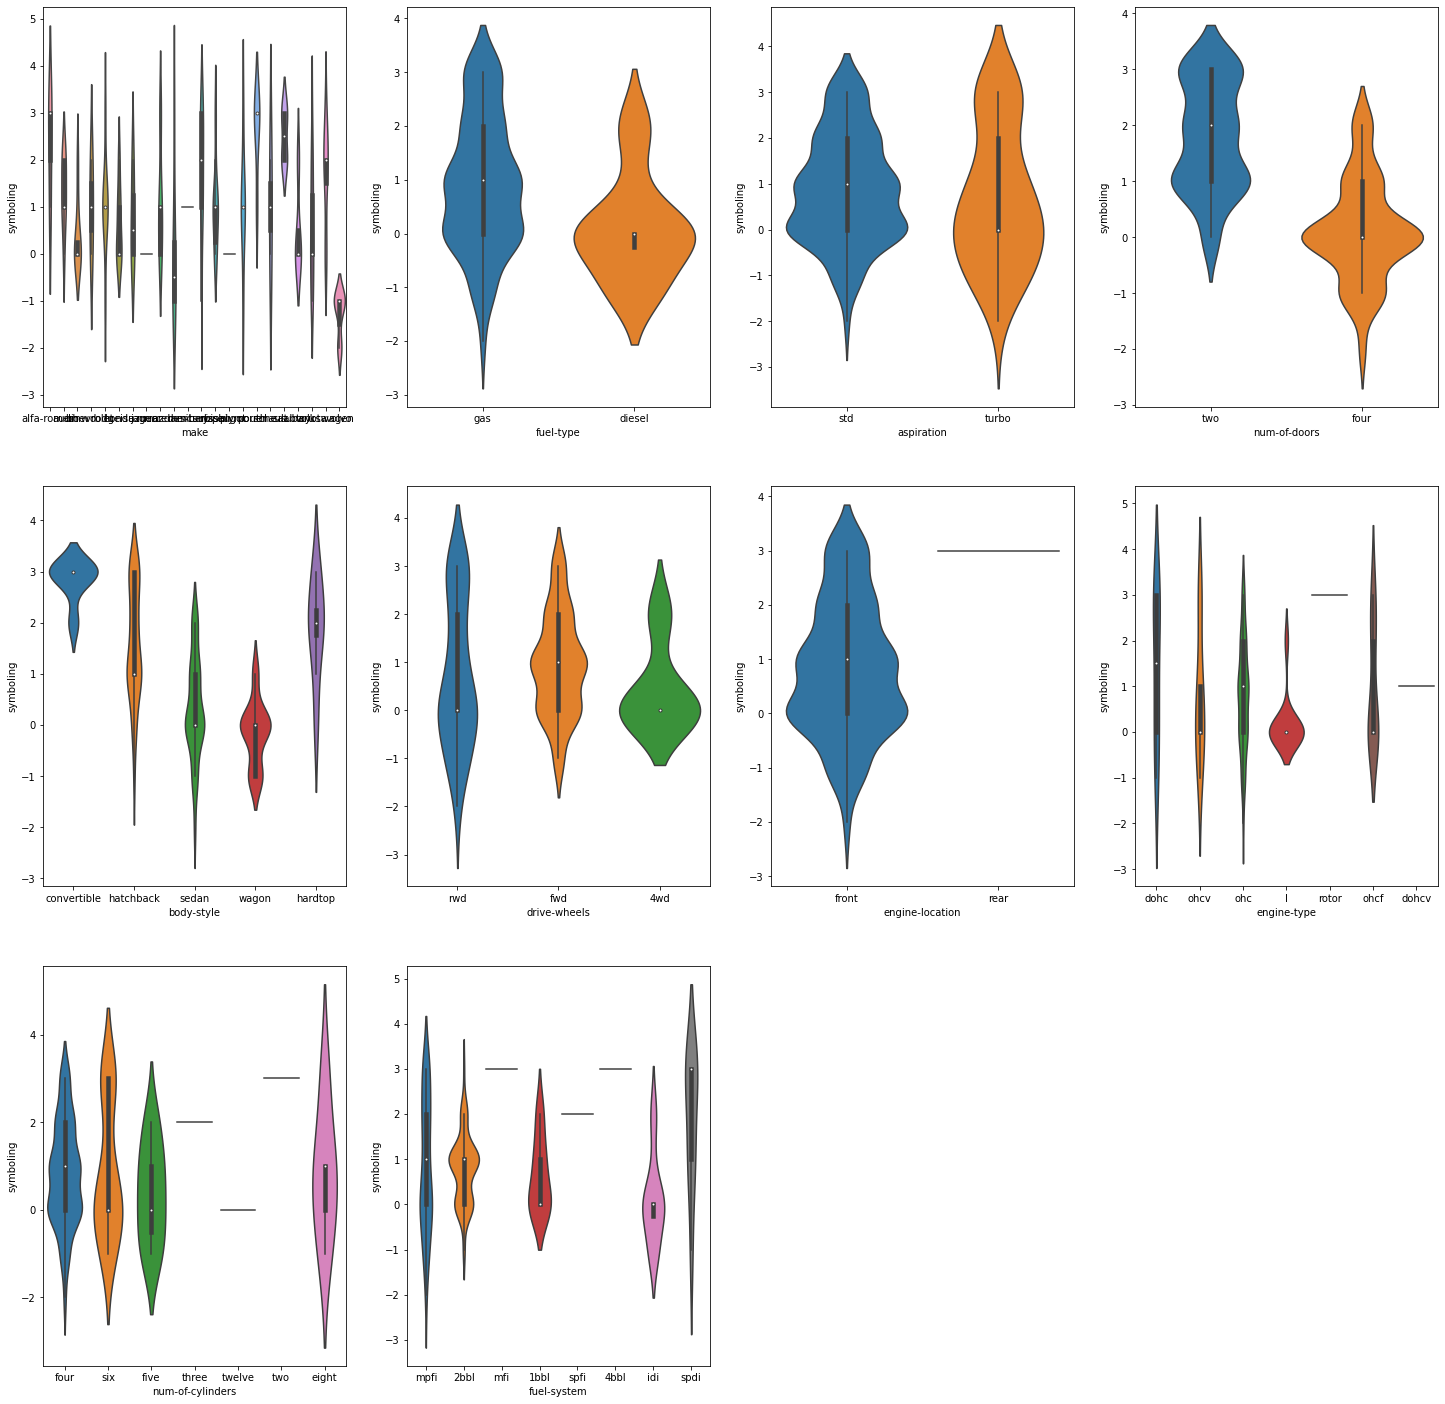

In [28]:
#We now want to deal with the categorical features. 
#We first make a series of violin plots 
#showing how each categorical feature affects
#the symboling value. 

plt.figure(figsize=(25,25))
fig_num = 0

#A Function that gives violin plots for 
#all categorical variables with respect 
#to the symboling value. 

def plot_categorical_vars(var):           
    plt.subplot(3,4, fig_num)
    sns.violinplot(x = var, y = 'symboling', data = df)

categorical_vars = df.dtypes[df.dtypes==object].index
for var in categorical_vars:
    fig_num = fig_num + 1
    plot_categorical_vars(var)

plt.show()

In [29]:
#There is noticeable variation in the distribution (and mean)
#of the symboling value within each feature apart from "aspiration".
#Although this feature does have some effect, it is much less pronounced
#than that of the other features.
#We will therefore drop this one and leave the others.

df.drop('aspiration', axis=1, inplace=True)
df

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,fuel-system,peak-rpm
0,3.0,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,mpfi,5000.0
1,3.0,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,mpfi,5000.0
2,1.0,122.0,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,mpfi,5000.0
3,2.0,164.0,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,mpfi,5500.0
4,2.0,164.0,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,mpfi,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952.0,ohc,four,mpfi,5400.0
201,-1.0,95.0,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049.0,ohc,four,mpfi,5300.0
202,-1.0,95.0,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012.0,ohcv,six,mpfi,5500.0
203,-1.0,95.0,volvo,diesel,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217.0,ohc,six,idi,4800.0


In [30]:
#Now that have all relevant numerical data in place, we need to encode the categorical data as well.
#We first check the percentages of each label for each categorical feature. 

print("make")
print(df['make'].value_counts(normalize=True).round(2))
print("\n")
print("fuel-type")
print(df['fuel-type'].value_counts(normalize=True).round(2))
print("\n")
print("num-of-doors")
print(df['num-of-doors'].value_counts(normalize=True).round(2))
print("\n")
print("drive-wheels")
print(df['drive-wheels'].value_counts(normalize=True).round(2))
print("\n")
print("engine-location")
print(df['engine-location'].value_counts(normalize=True).round(2))
print("\n")
print("engine-type")
print(df['engine-type'].value_counts(normalize=True).round(2))
print("\n")
print("body-style")
print(df['body-style'].value_counts(normalize=True).round(2))
print("\n")
print("num-of-cylinders")
print(df['num-of-cylinders'].value_counts(normalize=True).round(2))
print("\n")
print("fuel-system")
print(df['fuel-system'].value_counts(normalize=True).round(2))

make
toyota           0.16
nissan           0.09
mazda            0.08
mitsubishi       0.06
honda            0.06
volkswagen       0.06
subaru           0.06
peugot           0.05
volvo            0.05
dodge            0.04
mercedes-benz    0.04
bmw              0.04
audi             0.03
plymouth         0.03
saab             0.03
porsche          0.02
isuzu            0.02
jaguar           0.01
chevrolet        0.01
alfa-romero      0.01
renault          0.01
mercury          0.00
Name: make, dtype: float64


fuel-type
gas       0.9
diesel    0.1
Name: fuel-type, dtype: float64


num-of-doors
four    0.56
two     0.44
Name: num-of-doors, dtype: float64


drive-wheels
fwd    0.59
rwd    0.37
4wd    0.04
Name: drive-wheels, dtype: float64


engine-location
front    0.99
rear     0.01
Name: engine-location, dtype: float64


engine-type
ohc      0.72
ohcf     0.07
ohcv     0.06
dohc     0.06
l        0.06
rotor    0.02
dohcv    0.00
Name: engine-type, dtype: float64


body-style
sedan  

In [31]:
#Since engine location consists almost entirely of cars
#with engines in the front, this will have almost no effect on the result 
#so we drop this column.
df.drop('engine-location', axis = 1, inplace=True)

In [32]:
#num-of-doors and num_of_cylinders are secretly integers
#anyway, so we'll just convert the 
#names to the actual integer values.

df['num-of-doors'].replace({"two":2,"four":4}, inplace=True)
df['num-of-cylinders'].replace({"two":2,"three":3,"four":4,"five":5, "six":6,"eight":8,"twelve":12}, inplace=True)

In [33]:
#"num-of-doors" also has two NaN values,
#so we will just set those equal to 4, since
#this is the most common value. 

df['num-of-doors'].fillna(value=4, inplace=True)

In [34]:
#"fuel-type" has only two possible values. 
#so we'll replace the two values with an integer.

def binary_assignment(x):
    df[x] = df[x].astype("category").cat.codes

binary_categorical_features = ['fuel-type']
for feature in binary_categorical_features:
    binary_assignment(feature)
df.head()

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,fuel-system,peak-rpm
0,3.0,122.0,alfa-romero,1,2.0,convertible,rwd,88.6,168.8,64.1,48.8,2548.0,dohc,4,mpfi,5000.0
1,3.0,122.0,alfa-romero,1,2.0,convertible,rwd,88.6,168.8,64.1,48.8,2548.0,dohc,4,mpfi,5000.0
2,1.0,122.0,alfa-romero,1,2.0,hatchback,rwd,94.5,171.2,65.5,52.4,2823.0,ohcv,6,mpfi,5000.0
3,2.0,164.0,audi,1,4.0,sedan,fwd,99.8,176.6,66.2,54.3,2337.0,ohc,4,mpfi,5500.0
4,2.0,164.0,audi,1,4.0,sedan,4wd,99.4,176.6,66.4,54.3,2824.0,ohc,5,mpfi,5500.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int8   
 4   num-of-doors       205 non-null    float64
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   wheel-base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb-weight        205 non-null    float64
 12  engine-type        205 non-null    object 
 13  num-of-cylinders   205 non-null    int64  
 14  fuel-system        205 non-null    object 
 15  peak-rpm           205 non-null    float64
dtypes: float64(9), int64(1), i

In [36]:
#Most of the engine types are either
#"ohc" or involve "ohc", so we will 
#assign the 1 to these engine types,
#and 0 to the rest. 
def eng_map(x):
    if("ohc" in x):
        return 1
    else:
        return 0
engine_type=df['engine-type']
df['engine-type'] = engine_type.apply(lambda x: eng_map(x))

In [37]:
df.head()

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,fuel-system,peak-rpm
0,3.0,122.0,alfa-romero,1,2.0,convertible,rwd,88.6,168.8,64.1,48.8,2548.0,1,4,mpfi,5000.0
1,3.0,122.0,alfa-romero,1,2.0,convertible,rwd,88.6,168.8,64.1,48.8,2548.0,1,4,mpfi,5000.0
2,1.0,122.0,alfa-romero,1,2.0,hatchback,rwd,94.5,171.2,65.5,52.4,2823.0,1,6,mpfi,5000.0
3,2.0,164.0,audi,1,4.0,sedan,fwd,99.8,176.6,66.2,54.3,2337.0,1,4,mpfi,5500.0
4,2.0,164.0,audi,1,4.0,sedan,4wd,99.4,176.6,66.4,54.3,2824.0,1,5,mpfi,5500.0


In [38]:
#For the four other categorical features
#we will do one hot encoding using the Pandas "get_dummies"
#method, which seems to be easier than using the OneHotEncoder
#class from sklearn, since we are working with an entire dataframe.

df = pd.get_dummies(df, columns=['make','body-style','drive-wheels','fuel-system'])

In [39]:
df.head(25)

,symboling,normalized-losses,fuel-type,num-of-doors,wheel-base,length,width,height,curb-weight,engine-type,...,drive-wheels_fwd,drive-wheels_rwd,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,122.0,1,2.0,88.6,168.8,64.1,48.8,2548.0,1,...,0,1,0,0,0,0,0,1,0,0
1,3.0,122.0,1,2.0,88.6,168.8,64.1,48.8,2548.0,1,...,0,1,0,0,0,0,0,1,0,0
2,1.0,122.0,1,2.0,94.5,171.2,65.5,52.4,2823.0,1,...,0,1,0,0,0,0,0,1,0,0
3,2.0,164.0,1,4.0,99.8,176.6,66.2,54.3,2337.0,1,...,1,0,0,0,0,0,0,1,0,0
4,2.0,164.0,1,4.0,99.4,176.6,66.4,54.3,2824.0,1,...,0,0,0,0,0,0,0,1,0,0
5,2.0,122.0,1,2.0,99.8,177.3,66.3,53.1,2507.0,1,...,1,0,0,0,0,0,0,1,0,0
6,1.0,158.0,1,4.0,105.8,192.7,71.4,55.7,2844.0,1,...,1,0,0,0,0,0,0,1,0,0
7,1.0,122.0,1,4.0,105.8,192.7,71.4,55.7,2954.0,1,...,1,0,0,0,0,0,0,1,0,0
8,1.0,158.0,1,4.0,105.8,192.7,71.4,55.9,3086.0,1,...,1,0,0,0,0,0,0,1,0,0
9,0.0,122.0,1,2.0,99.5,178.2,67.9,52.0,3053.0,1,...,0,0,0,0,0,0,0,1,0,0


In [40]:
#We now have fifty features, all of them numerical,
#with no missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    float64
 1   normalized-losses       205 non-null    float64
 2   fuel-type               205 non-null    int8   
 3   num-of-doors            205 non-null    float64
 4   wheel-base              205 non-null    float64
 5   length                  205 non-null    float64
 6   width                   205 non-null    float64
 7   height                  205 non-null    float64
 8   curb-weight             205 non-null    float64
 9   engine-type             205 non-null    int64  
 10  num-of-cylinders        205 non-null    int64  
 11  peak-rpm                205 non-null    float64
 12  make_alfa-romero        205 non-null    uint8  
 13  make_audi               205 non-null    uint8  
 14  make_bmw                205 non-null    ui

In [41]:
print(df.isnull().sum())  

symboling                 0
normalized-losses         0
fuel-type                 0
num-of-doors              0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
engine-type               0
num-of-cylinders          0
peak-rpm                  0
make_alfa-romero          0
make_audi                 0
make_bmw                  0
make_chevrolet            0
make_dodge                0
make_honda                0
make_isuzu                0
make_jaguar               0
make_mazda                0
make_mercedes-benz        0
make_mercury              0
make_mitsubishi           0
make_nissan               0
make_peugot               0
make_plymouth             0
make_porsche              0
make_renault              0
make_saab                 0
make_subaru               0
make_toyota               0
make_volkswagen           0
make_volvo                0
body-style_convertible    0
body-style_hardtop  

In [42]:
#Now we can also calculate descriptive statistics for the whole data frame.
df.describe()

,symboling,normalized-losses,fuel-type,num-of-doors,wheel-base,length,width,height,curb-weight,engine-type,...,drive-wheels_fwd,drive-wheels_rwd,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,0.902439,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,0.921951,...,0.585366,0.370732,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,31.681008,0.297446,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,0.268905,...,0.493865,0.484183,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,65.000000,0.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,1.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,122.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,137.000000,1.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,256.000000,1.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Machine Learning

### Train and test sets and feature scaling

In [43]:
#Since the target feature is "symboling", we will drop this 
#from the data frame before doing the train test split.
y=df.pop('symboling')

In [44]:
df.head()

,normalized-losses,fuel-type,num-of-doors,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,...,drive-wheels_fwd,drive-wheels_rwd,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,122.0,1,2.0,88.6,168.8,64.1,48.8,2548.0,1,4,...,0,1,0,0,0,0,0,1,0,0
1,122.0,1,2.0,88.6,168.8,64.1,48.8,2548.0,1,4,...,0,1,0,0,0,0,0,1,0,0
2,122.0,1,2.0,94.5,171.2,65.5,52.4,2823.0,1,6,...,0,1,0,0,0,0,0,1,0,0
3,164.0,1,4.0,99.8,176.6,66.2,54.3,2337.0,1,4,...,1,0,0,0,0,0,0,1,0,0
4,164.0,1,4.0,99.4,176.6,66.4,54.3,2824.0,1,5,...,0,0,0,0,0,0,0,1,0,0


In [45]:
#We split the data set into a test and training set.
#As is standard the size of the training set is 70 percent.

X=df
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state=42)

In [46]:
#Many of the algorithms we will use
#in the sequel will require standardisation.
#We do feature scaling with a standard scaler,
#and this is our new training set. We do the same
#thing with the test set (except that we don't use fit).


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [47]:
X_train

array([[-1.7818748 ,  0.30265996,  0.87488976, ...,  1.00701763,
        -0.20927403, -0.08391814],
       [-0.02500272,  0.30265996, -1.14300114, ...,  1.00701763,
        -0.20927403, -0.08391814],
       [-1.7818748 , -3.30403793,  0.87488976, ..., -0.99303127,
        -0.20927403, -0.08391814],
       ...,
       [-0.02500272,  0.30265996,  0.87488976, ..., -0.99303127,
        -0.20927403, -0.08391814],
       [ 2.28667107,  0.30265996, -1.14300114, ...,  1.00701763,
        -0.20927403, -0.08391814],
       [-0.45651516,  0.30265996,  0.87488976, ...,  1.00701763,
        -0.20927403, -0.08391814]])

### Application of various machine learning models

In this section we will evaluate several machine learning classifiers
to predict the symboling value.

#### The k-nearest neighbours classifier

We will beginn with the k-nearest neighbours classifer. There are two basic parameters that one can adjust here,
The first is p, which refers to the value of p in the Minkowski distance. Taking p=2 gives the standard Euclidean
distance, whereas p=1 gives the Manhattan distance. The other parameter is the k defining knn, which is set to 5
by default. We will also adjust this parameter to see what this does to the performance.

In [48]:
knn_euc = KNeighborsClassifier(p=2)

In [49]:
knn_man = KNeighborsClassifier(p=1)

In [50]:
knn_euc_10 = KNeighborsClassifier(p=2,n_neighbors=10)

In [51]:
knn_man_10 = KNeighborsClassifier(p=1,n_neighbors=10)

In [52]:
knn_euc.fit(X_train, y_train).score(X_train, y_train)

0.7272727272727273

In [53]:
knn_man.fit(X_train, y_train).score(X_train, y_train)

0.7412587412587412

In [54]:
knn_euc_10.fit(X_train, y_train).score(X_train, y_train)

0.6013986013986014

In [55]:
knn_man_10.fit(X_train, y_train).score(X_train, y_train)

0.6013986013986014

In [56]:
y_pred_knn_euc = knn_euc.predict(X_test)
y_pred_knn_euc

array([ 0.,  1.,  1.,  2., -1.,  1.,  0.,  0.,  0.,  2.,  2.,  1.,  0.,
       -1., -1.,  0.,  1.,  3.,  2.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,
        2., -1.,  1., -1., -1.,  1.,  0., -1.,  3., -1.,  0.,  1.,  0.,
        3.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  2.,
        1., -1.,  1.,  1.,  2.,  1.,  3.,  2.,  0.,  3.])

In [57]:
y_pred_knn_man = knn_man.predict(X_test)
y_pred_knn_man

array([ 0.,  1.,  1.,  2., -1.,  1.,  0.,  0.,  0.,  2.,  2.,  1., -2.,
       -1., -1.,  0.,  1.,  3.,  1.,  2.,  1.,  0.,  1.,  1.,  1.,  0.,
        2., -1.,  1., -1., -1.,  1.,  0., -1.,  2., -1.,  0.,  1.,  1.,
        3.,  0., -1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  2.,
        1., -1.,  1.,  1.,  2.,  1.,  3.,  2.,  0.,  3.])

In [58]:
y_pred_knn_euc_10 = knn_euc_10.predict(X_test)
y_pred_knn_euc

array([ 0.,  1.,  1.,  2., -1.,  1.,  0.,  0.,  0.,  2.,  2.,  1.,  0.,
       -1., -1.,  0.,  1.,  3.,  2.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,
        2., -1.,  1., -1., -1.,  1.,  0., -1.,  3., -1.,  0.,  1.,  0.,
        3.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  2.,
        1., -1.,  1.,  1.,  2.,  1.,  3.,  2.,  0.,  3.])

In [59]:
y_pred_knn_man_10 = knn_man_10.predict(X_test)
y_pred_knn_man

array([ 0.,  1.,  1.,  2., -1.,  1.,  0.,  0.,  0.,  2.,  2.,  1., -2.,
       -1., -1.,  0.,  1.,  3.,  1.,  2.,  1.,  0.,  1.,  1.,  1.,  0.,
        2., -1.,  1., -1., -1.,  1.,  0., -1.,  2., -1.,  0.,  1.,  1.,
        3.,  0., -1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  2.,
        1., -1.,  1.,  1.,  2.,  1.,  3.,  2.,  0.,  3.])

We see that changing the metric had a small effect on the results, but changing the 
number of nearest neighbours did not. The former does seem to affect training accuracy 
though.

#### The logistic regression classifier
We will now try logistic regression, both with and without
regularisation. 

In [60]:
log_reg= LogisticRegression(random_state=0,penalty="none")

In [61]:
log_reg.fit(X_train, y_train).score(X_train, y_train)

1.0

In [62]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([ 0.,  2.,  1.,  3., -1.,  1.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,
       -1., -1.,  1.,  2.,  3.,  1.,  2.,  0.,  0.,  1.,  2.,  1.,  1.,
        2., -1.,  0., -2., -1.,  1.,  0., -1.,  3.,  3.,  2.,  3.,  0.,
        3.,  0.,  2.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  3.,  0.,  3.,
        2., -1.,  0.,  2.,  2.,  3.,  3.,  2.,  0.,  3.])

In [63]:
log_reg_pen= LogisticRegression(random_state=0)

In [64]:
log_reg_pen.fit(X_train, y_train).score(X_train, y_train)

0.951048951048951

In [65]:
y_pred_log_reg_pen = log_reg_pen.predict(X_test)
y_pred_log_reg_pen

array([ 0.,  2.,  0.,  3., -1.,  1.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,
       -1., -1.,  0.,  0.,  3.,  1.,  0.,  0.,  0.,  1.,  2.,  1.,  1.,
        2., -1.,  0., -2., -1.,  1.,  0., -1.,  3.,  2.,  2.,  3.,  0.,
        3.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  1.,  0.,  3.,
        1., -1.,  0.,  1.,  2.,  3.,  3.,  2.,  0.,  1.])

#### The decision tree
Here we try decision trees. The main parameter for a decision tree is the max depth.
We keep the default "none" here so that the tree expands as far as possible.
We will however play around with the criterion for determining the quality of the
split. We'll see what happens if we use the gini coefficient vs. the entropy. 

In [66]:
dec_tree_gini=DecisionTreeClassifier(random_state=0)

In [67]:
dec_tree_gini.fit(X_train, y_train).score(X_train, y_train)

1.0

In [68]:
y_pred_dec_tree_gini = dec_tree_gini.predict(X_test)
y_pred_dec_tree_gini

array([ 1.,  1.,  0.,  3., -1.,  1.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,
       -1., -1.,  0.,  1.,  3.,  1.,  0.,  0.,  0.,  2.,  2.,  1.,  1.,
        2., -1.,  0., -2., -1.,  1.,  0., -1.,  2.,  3.,  0.,  3.,  0.,
        3.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  3.,  1.,  3.,
        1., -1.,  0.,  1.,  2.,  3.,  3.,  2.,  0.,  3.])

In [69]:
dec_tree_entropy=DecisionTreeClassifier(random_state=0,criterion='entropy')

In [70]:
dec_tree_entropy.fit(X_train, y_train).score(X_train, y_train)

1.0

In [71]:
y_pred_dec_tree_entropy = dec_tree_entropy.predict(X_test)
y_pred_dec_tree_entropy

array([ 1.,  1.,  0.,  3., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  1., -1.,
       -1., -1.,  0.,  1.,  3.,  1.,  0.,  0.,  0.,  2.,  2.,  1.,  1.,
        2., -1.,  0., -2., -1.,  1.,  0., -1.,  2.,  1.,  0.,  3.,  1.,
        3.,  0., -1.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  3.,  1.,  3.,
        1., -1.,  0.,  2.,  2.,  3.,  3.,  2.,  0.,  3.])

#### The support vector machine classifier

Finally, for good measure we will throw in a support vector machine. 
On the one hand, in principle, this ought to perform fairly well since we're working in a high
dimensional space. On the other, we have an imbalanced data set, which has a high probability
of affecting the results negatively in the case of this model.

In [72]:
supp_vect = svm.SVC()

In [73]:
supp_vect.fit(X_train, y_train).score(X_train, y_train)

0.8671328671328671

In [74]:
y_pred_supp_vect = supp_vect.predict(X_test)
y_pred_supp_vect

array([ 0.,  2.,  0.,  3., -1.,  1.,  0.,  0.,  0.,  2.,  2.,  1.,  0.,
       -1., -1.,  0.,  0.,  3.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
        2., -1.,  0., -1., -1.,  1.,  0., -1.,  3.,  1.,  0.,  3.,  1.,
        3.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,
        0., -1.,  0.,  1.,  2.,  3.,  3.,  1.,  0.,  3.])

### Analysis of Results

#### k-nearest neighbours analysis

In [75]:
#We print the classification report for the knn_euc model. 
#Note the warning below. This occurs because there are very
#few -2 symboling values in the data set, so none were predicted.
#Therfore precision, recall, and F-1 involve dividing by zero. 
# In fact there's only one -2 in the test set, so we will ignore this,
#although, this could indicate a weakness in our model. 
report = classification_report(y_test, y_pred_knn_euc)
print(report)

              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         1
        -1.0       0.67      1.00      0.80         6
         0.0       0.89      0.71      0.79        24
         1.0       0.48      0.77      0.59        13
         2.0       0.50      0.44      0.47         9
         3.0       0.80      0.44      0.57         9

    accuracy                           0.66        62
   macro avg       0.56      0.56      0.54        62
weighted avg       0.70      0.66      0.66        62



C:\Users\bsibl\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bsibl\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bsibl\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


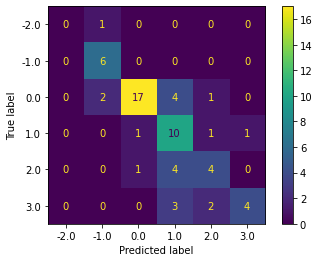

In [76]:
#Here we plot the confusion matrix. 
cm_knn_euc = confusion_matrix(y_test, y_pred_knn_euc)
ConfusionMatrixDisplay(cm_knn_euc, display_labels=np.unique(y_test)).plot()

In [77]:
#We print the classification report for the knn_euc model. 
#We can see that the accuracy has gone down slightly. This
#probably has something to do with the fact that we have predicted
#a -2 this time (but incorrectly). 
report_knn_euc = classification_report(y_test, y_pred_knn_man)
print(report_knn_euc)

              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         1
        -1.0       0.60      1.00      0.75         6
         0.0       0.93      0.54      0.68        24
         1.0       0.46      0.85      0.59        13
         2.0       0.44      0.44      0.44         9
         3.0       1.00      0.44      0.62         9

    accuracy                           0.61        62
   macro avg       0.57      0.55      0.51        62
weighted avg       0.72      0.61      0.62        62



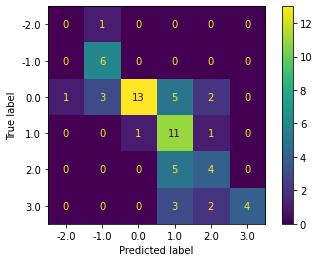

In [78]:
cm_knn_man = confusion_matrix(y_test, y_pred_knn_man)
ConfusionMatrixDisplay(cm_knn_man, display_labels=np.unique(y_test)).plot()

We can see by looking at the confusion matrices that the results for this model are
somewhat disappointing. They both have trouble predicting each of the different classes.
The Euclidean distance might do slightly better overall, but neither is spectactacular.
Given that the accuracy for both models dropped, from the training accuracy, there's probably 
a bit of overfitting. 

#### Logistic regression analysis

In [79]:
report_log_reg = classification_report(y_test, y_pred_log_reg)
print(report_log_reg)

              precision    recall  f1-score   support

        -2.0       1.00      1.00      1.00         1
        -1.0       0.86      1.00      0.92         6
         0.0       0.83      0.62      0.71        24
         1.0       0.67      0.62      0.64        13
         2.0       0.62      0.89      0.73         9
         3.0       0.82      1.00      0.90         9

    accuracy                           0.76        62
   macro avg       0.80      0.85      0.82        62
weighted avg       0.77      0.76      0.75        62



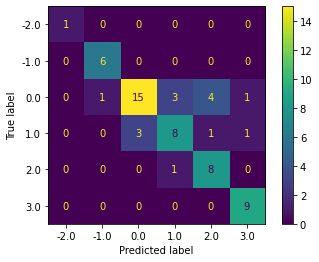

In [80]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
ConfusionMatrixDisplay(cm_log_reg, display_labels=np.unique(y_test)).plot()

In [81]:
report_log_reg_pen = classification_report(y_test, y_pred_log_reg_pen)
print(report_log_reg_pen)

              precision    recall  f1-score   support

        -2.0       1.00      1.00      1.00         1
        -1.0       0.86      1.00      0.92         6
         0.0       0.78      0.75      0.77        24
         1.0       0.57      0.62      0.59        13
         2.0       0.67      0.67      0.67         9
         3.0       0.88      0.78      0.82         9

    accuracy                           0.74        62
   macro avg       0.79      0.80      0.80        62
weighted avg       0.75      0.74      0.74        62



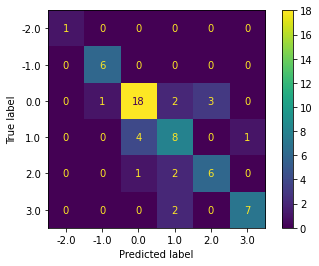

In [82]:
cm_log_reg_pen = confusion_matrix(y_test, y_pred_log_reg_pen)
ConfusionMatrixDisplay(cm_log_reg_pen, display_labels=np.unique(y_test)).plot()

The analysis of logistic regression is similar to that of knn,
although the situation seems to be a bit better here. Notice that
for these models we had very high training accuracy (it was actually 1
in the non-regularised case), so we are most certainly overfitting. 
The accuracy for these models is higher than for the knn models,
and they also do much better with predicting -2,1, and 3 classes.

#### Decision tree analysis

In [83]:
report_dec_tree_gini = classification_report(y_test, y_pred_dec_tree_gini)
print(report_dec_tree_gini)

              precision    recall  f1-score   support

        -2.0       1.00      1.00      1.00         1
        -1.0       0.86      1.00      0.92         6
         0.0       0.85      0.71      0.77        24
         1.0       0.56      0.69      0.62        13
         2.0       0.88      0.78      0.82         9
         3.0       0.90      1.00      0.95         9

    accuracy                           0.79        62
   macro avg       0.84      0.86      0.85        62
weighted avg       0.80      0.79      0.79        62



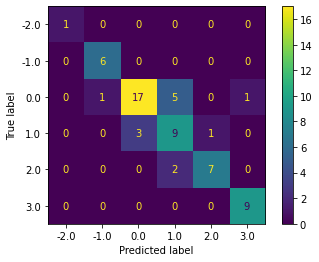

In [84]:
cm_dec_tree_gini = confusion_matrix(y_test, y_pred_dec_tree_gini)
ConfusionMatrixDisplay(cm_dec_tree_gini, display_labels=np.unique(y_test)).plot()

In [85]:
report_dec_tree_entropy = classification_report(y_test, y_pred_dec_tree_entropy)
print(report_dec_tree_entropy)

              precision    recall  f1-score   support

        -2.0       1.00      1.00      1.00         1
        -1.0       0.67      1.00      0.80         6
         0.0       0.80      0.67      0.73        24
         1.0       0.60      0.69      0.64        13
         2.0       0.88      0.78      0.82         9
         3.0       1.00      1.00      1.00         9

    accuracy                           0.77        62
   macro avg       0.82      0.86      0.83        62
weighted avg       0.79      0.77      0.77        62



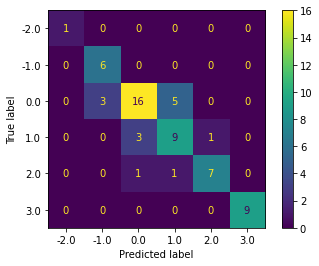

In [86]:
cm_dec_tree_entropy = confusion_matrix(y_test, y_pred_dec_tree_entropy)
ConfusionMatrixDisplay(cm_dec_tree_entropy, display_labels=np.unique(y_test)).plot()

In general, the decision trees perform well. We again had a 
training error of zero, so we expect these models to be overfitting.
Nevertheless, the results are not bad. The accuracy is fairly high,
but also most classes are dealt with reasonably well. These models
still do struggle a bit differentiating between -1,0, and 1,
but nail the other values pretty well.

#### Support vector machine analysis 

In [87]:
report_supp_vect = classification_report(y_test, y_pred_supp_vect)
print(report_supp_vect)

              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         1
        -1.0       0.75      1.00      0.86         6
         0.0       0.72      0.75      0.73        24
         1.0       0.44      0.54      0.48        13
         2.0       0.60      0.33      0.43         9
         3.0       0.88      0.78      0.82         9

    accuracy                           0.66        62
   macro avg       0.56      0.57      0.55        62
weighted avg       0.66      0.66      0.65        62



C:\Users\bsibl\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bsibl\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bsibl\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


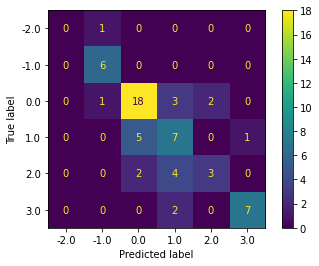

In [88]:
cm_supp_vect = confusion_matrix(y_test, y_pred_supp_vect)
ConfusionMatrixDisplay(cm_supp_vect, display_labels=np.unique(y_test)).plot()

The confusion matrix shows somewhat disappointing results for the support
vector machine we have chosen. As we remarked earlier, this is possibly due
to the unbalanced nature of the data set. It's perhaps unsurprising for example
that this model was unable to correctly classify the one -2 in the test set.

### Improving the results with a voting classifier

#### The voting classifier
Just for good measure we'll also apply an ensemble method to try to improve on the previous results. Here we use a voting classifier constructed using one of each of the above models.

In [89]:
voting_class = VotingClassifier(estimators=[('svm', supp_vect), ('log_reg', log_reg), ('log_reg_pen', log_reg_pen), ('dtr_gini', dec_tree_gini),('dtr_entropy', dec_tree_entropy), ('knn_euc', knn_euc),('knn_man', knn_man)])
voting_class.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC()),
                             ('log_reg',
                              LogisticRegression(penalty='none',
                                                 random_state=0)),
                             ('log_reg_pen',
                              LogisticRegression(random_state=0)),
                             ('dtr_gini',
                              DecisionTreeClassifier(random_state=0)),
                             ('dtr_entropy',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0)),
                             ('knn_euc', KNeighborsClassifier()),
                             ('knn_man', KNeighborsClassifier(p=1))])

In [90]:
y_pred_voting_class = voting_class.predict(X_test)
y_pred_voting_class

array([ 0.,  1.,  0.,  3., -1.,  1.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,
       -1., -1.,  0.,  1.,  3.,  1.,  0.,  0.,  0.,  1.,  2.,  1.,  1.,
        2., -1.,  0., -2., -1.,  1.,  0., -1.,  3., -1.,  0.,  3.,  0.,
        3.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  1.,  1.,  3.,
        1., -1.,  0.,  1.,  2.,  3.,  3.,  2.,  0.,  3.])

In [91]:
report_voting_class = classification_report(y_test, y_pred_voting_class)
print(report_voting_class)

              precision    recall  f1-score   support

        -2.0       1.00      1.00      1.00         1
        -1.0       0.75      1.00      0.86         6
         0.0       0.86      0.79      0.83        24
         1.0       0.56      0.69      0.62        13
         2.0       1.00      0.67      0.80         9
         3.0       0.89      0.89      0.89         9

    accuracy                           0.79        62
   macro avg       0.84      0.84      0.83        62
weighted avg       0.82      0.79      0.79        62



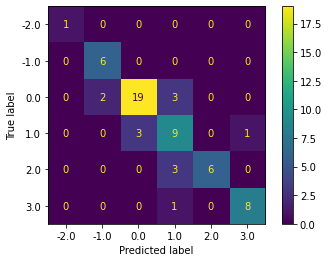

In [92]:
cm_voting_class = confusion_matrix(y_test, y_pred_voting_class)
ConfusionMatrixDisplay(cm_voting_class, display_labels=np.unique(y_test)).plot()

From the confusion matrix we can see that the performance is similar
to that of the decision trees, but we have a slightly higher accuracy,
and we have perhaps improved our ability to distinguish -1,0, and 1 a little.

### Comparison with a feed forward neural network

In [93]:
#In order to apply the neural network, we will need to encode our
#target values. We will use label encoding.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded=le.fit_transform(y_test)

In [94]:
#Here we define the feed-forward neural network. There is an input 
#layer, two hidden layers, with 100 neurons each, and an output layer
#with six neurons corresponding to our six classes. Since this is 
#a multiclass problem we have used softmax for the output activation
#function.
fnn_model = Sequential()
fnn_model.add(Dense(100, activation='relu', input_shape=(49,)))
fnn_model.add(Dense(100, activation='relu', input_shape=(49,)))
fnn_model.add(Dense(6, activation='softmax'))

In [95]:
#We compile the model. Since we have use label encoding and this is
#a multiclass problem, we use the sparse categorical cross entropy 
#for the loss function, and sparse categorical accuracy for the metric.
#Note that we use sparse because the targets have been label encoded rather 
#than one-hot encoded.
fnn_model.compile(loss='sparse_categorical_crossentropy',
optimizer='sgd',
metrics=['sparse_categorical_accuracy'])

In [96]:
#We fit the fnn on the training data.
fnn_model.fit(X_train, y_train_encoded,epochs=20,batch_size=1)

Epoch 1/20
143/143 [==============================] - 1s 1ms/step - loss: 1.4871 - sparse_categorical_accuracy: 0.3916
Epoch 2/20
143/143 [==============================] - 0s 2ms/step - loss: 0.9016 - sparse_categorical_accuracy: 0.7203
Epoch 3/20
143/143 [==============================] - 0s 2ms/step - loss: 0.6519 - sparse_categorical_accuracy: 0.7972
Epoch 4/20
143/143 [==============================] - 0s 1ms/step - loss: 0.4963 - sparse_categorical_accuracy: 0.8392
Epoch 5/20
143/143 [==============================] - 0s 2ms/step - loss: 0.3901 - sparse_categorical_accuracy: 0.8951
Epoch 6/20
143/143 [==============================] - 0s 2ms/step - loss: 0.3274 - sparse_categorical_accuracy: 0.8881
Epoch 7/20
143/143 [==============================] - 0s 2ms/step - loss: 0.2781 - sparse_categorical_accuracy: 0.9161
Epoch 8/20
143/143 [==============================] - 0s 2ms/step - loss: 0.2517 - sparse_categorical_accuracy: 0.9161
Epoch 9/20
143/143 [============================

In [97]:
#We obtain the encoded predictions.
y_pred_fnn_encoded = fnn_model.predict(X_test)

In [98]:
#Since the softmax returns a probability, we have to get an 
#integer back by doing a thresholding procedure.
y_pred_fnn_encoded = list(map(lambda x: np.argmax(x), y_pred_fnn_encoded))

In [99]:
#Here are the results, but they're still encoded.
y_pred_fnn_encoded

[2,
 4,
 2,
 5,
 1,
 3,
 2,
 2,
 2,
 4,
 4,
 3,
 2,
 1,
 1,
 2,
 3,
 5,
 3,
 2,
 2,
 2,
 3,
 4,
 3,
 2,
 4,
 1,
 2,
 0,
 1,
 3,
 2,
 1,
 5,
 1,
 4,
 5,
 3,
 5,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 4,
 2,
 3,
 2,
 5,
 4,
 1,
 2,
 4,
 4,
 5,
 5,
 4,
 2,
 5]

In [100]:
#In order to decode them and get the results in our original range ((-3,3)) 
#we perform an inverse transform. 
y_pred_fnn=le.inverse_transform(y_pred_fnn_encoded)
y_pred_fnn

array([ 0.,  2.,  0.,  3., -1.,  1.,  0.,  0.,  0.,  2.,  2.,  1.,  0.,
       -1., -1.,  0.,  1.,  3.,  1.,  0.,  0.,  0.,  1.,  2.,  1.,  0.,
        2., -1.,  0., -2., -1.,  1.,  0., -1.,  3., -1.,  2.,  3.,  1.,
        3.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  1.,  0.,  3.,
        2., -1.,  0.,  2.,  2.,  3.,  3.,  2.,  0.,  3.])

In [101]:
report_fnn = classification_report(y_test, y_pred_fnn)
print(report_fnn)

              precision    recall  f1-score   support

        -2.0       1.00      1.00      1.00         1
        -1.0       0.75      1.00      0.86         6
         0.0       0.82      0.75      0.78        24
         1.0       0.64      0.54      0.58        13
         2.0       0.64      0.78      0.70         9
         3.0       0.89      0.89      0.89         9

    accuracy                           0.76        62
   macro avg       0.79      0.83      0.80        62
weighted avg       0.76      0.76      0.75        62



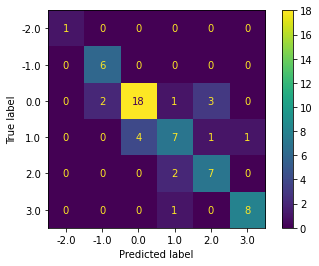

In [102]:
cm_fnn = confusion_matrix(y_test, y_pred_fnn)
ConfusionMatrixDisplay(cm_fnn, display_labels=np.unique(y_test)).plot()

These results are relatively good. Because the training accuracy of the fnn
is so high, we are almost certainly overfitting. One could perhaps reduce the 
degree of overfitting by making the model simpler. Nevertheless, the model performs 
relatively well on most classes. It's perhaps not as as good at finding the ones
as the decision trees or the ensemble classifier, but overall does a better job than the rest.

## Discussion

Overall I'd say the most accurate model is the voting classifier, as one might expect.
There seems to have been a bit of improvement over the decision tree algorithms, which 
also performed fairly well. We would perhaps expect this to be the case since there
were a large number of categorical features initially, which is handled well by decision trees.
It may be that that encoding of these had a negative effect on some of other algorithms that require numerical input.

The neural network and logistic regression also had reasonable results, particularly the former.

As was perhaps to be expected, the support vector machine and the knn algorithms had the worst results, probably for opposite reasons. Support vector machines tend to work well in higher dimensions (i.e. with a large number of features), but not so well with unbalanced data sets. KNN has trouble in higher dimensions, because the algorithm involves calculating the value 
of a distance function, which becomes more complex.